In [115]:
import os 
import pandas as pd
import numpy as np

## Files donwload

In [116]:

path_concat=r"../../Project Hager/Fichiers Hager/Dataset_Creation/output-data/Impedance_dataset.csv"
path_hager=r"../../Project Hager/Fichiers Hager/Impedance_Datasets/Impédance par lot.xlsx"

df_lot_hager= pd.read_excel(path_hager, "Récapitulatif")
df_lot_concat = pd.read_csv(path_concat, sep=',')

path_tracability=r"../../Project Hager/Fichiers Hager/Dataset_Creation/output-data/TracabiliteDesLots_2020_2022.csv"
df_tracability = pd.read_csv(path_tracability, sep=',')


C:\Users\myedroud\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (62,64,65,66,67,68,70,71,72,74,75,76,77,78,79,80,81,82,83,84,85,100,105,106,109,110,111,116,117,118,123,129) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Columns info

In [3]:

hager_columns=set(df_lot_hager.columns);
tracability_columns=set(df_tracability.columns);
concat_columns=set(df_lot_concat.columns);

print(len(tracability_columns))
print(len(hager_columns))
print(len(concat_columns))

print(len(hager_columns.union(tracability_columns)))


l1=[]
diff=[]
for i in list(hager_columns)+list(tracability_columns):
    if i not in l1:
        l1.append(i)
    else:
        diff.append(i)

print(f'Parameters that are in both {diff} \n \n')

d=concat_columns-hager_columns

d1=hager_columns-concat_columns

d2=tracability_columns.intersection(concat_columns)


A=d.intersection(tracability_columns)

print(A)

print(f'\n \n first set{d}, \n \n second set {d1} , \n \n third set {d2}')


20
68
130
84
Parameters that are in both ['Aimant', 'Palette', 'Armature', 'C'] 
 

{'qu sortie SB', 'DFil1', 'Type', 'Capot', 'Ressort', 'DFil2', 'Socle', 'Support', 'Carcasse', 'Poussoir'}

 
 first set{'Aspect', 'Ligne_Tracabilité', 'Moyenne de Etendue AB', 'DFil1', 'Actions', 'Palette_y', 'X11', 'Support', 'Socle', 'Moyenne', 'Moyenne de Médiane GSP-PSP', 'Carcasse', 'Armature_y', 'X lcl', 'dérogation', 'AR1', 'Finition', 'X10', 'X3', 'Moyenne de Médiane AB', 'Date_hauteur', 'type', 'qu sortie SB', 'X5', 'Rugosite', 'X2', 'AR5', 'Date_keyence', 'R ucl', 'X4', 'Type', 'Poussoir', 'info qualité', 'Equipe', 'C_tracabilite', 'X9', 'X12', 'ET', 'AR4', 'Date_mesure', 'Moyenne de la série', 'Min', 'type de contrôle', 'AR2', 'R lcl', 'Etendue', 'Date_tracabilite', 'MOY', 'X7', 'Correction', 'Aimant_y', 'X1', 'Ligne_mesure', 'Max', 'Capot', 'X ucl', 'Ressort', 'Palette.1', 'DFil2', 'AR3', 'Moyenne de Etendue GSP-PSP', 'X6', "moyenne de l'étendu", 'X8', 'Heure'}, 
 
 second set {'Soudure Las

## Check column exists

In [4]:
print('date zone 2' in hager_columns)

True


## Plot impédance par date zone 2

<bound method NDFrame.head of        N° lot  Plage lot Ref Relais  Nb spires  EACAR  Année   Semaine  \
15       1001       1000     0Z5117      490.0      1   2012  S2012/01   
16       1001       1000     0Z5117      490.0      1   2012  S2012/01   
19       1001       1000     0Z5117      515.0      1   2013  S2013/02   
22       1001       1000     0Z5117      515.0      1   2013  S2013/02   
23       1001       1000     0Z5117      515.0      1   2014  S2014/02   
...       ...        ...        ...        ...    ...    ...       ...   
45821    6736       6000     0Z6117      595.0      4   2020  S2020/52   
45824    6736       6000     0Z6117      595.0      4   2020  S2020/52   
45842    6739       6000     0Z6117      535.0      4   2020  S2020/53   
45844    6739       6000     0Z6117      535.0      4   2020  S2020/52   
45853    6740       6000     0Z6117      535.0      4   2020  S2021/01   

              Le  % de rebut global      ok  ...   Som Udemag²   Aimant  \
15    

<AxesSubplot:xlabel='date zone 2'>

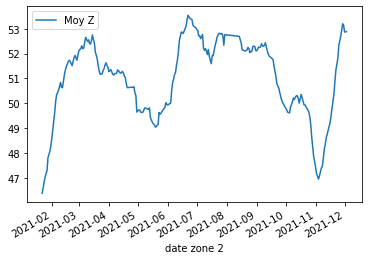

In [8]:
import matplotlib.pyplot as plt
plage= df_lot_hager[['Plage lot', 'Ref Relais']].copy()
#dt_lot_filter= dt_lot[dt_lot['Plage lot'].isin([1000,6000]) & dt_lot['Ref Relais'].isin(['0Z5117', '0Z6117']) & dt_lot['Moy Z']<100 & dt_lot['Nb spires'].isin(range(400, 600))].copy()
dt_lot_filter= df_lot_hager[df_lot_hager['Plage lot'].isin([1000,6000]) & df_lot_hager['Ref Relais'].isin(['0Z5117', '0Z6117'])].copy()
#dt_lot_filter = dt_lot_filter[dt_lot_filter['Nb spires'].isin(range(400, 600))]
print(dt_lot_filter.head)
print(dt_lot_filter['Moy Z'].max())
dt_lot_filter = dt_lot_filter.sort_values('date zone 2', ascending=True).reset_index(drop=True)

FINAL=dt_lot_filter[['date zone 2', 'Moy Z']].groupby('date zone 2').mean().rolling(20).mean()
FINAL.plot()





## Plot impédance par date zone 3

66.18022351266183


<AxesSubplot:xlabel='Le'>

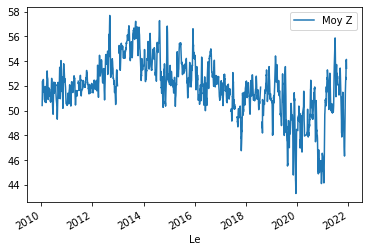

In [11]:
import matplotlib.pyplot as plt
plage= df_lot_hager[['Plage lot', 'Ref Relais']].copy()
#dt_lot_filter= dt_lot[dt_lot['Plage lot'].isin([1000,6000]) & dt_lot['Ref Relais'].isin(['0Z5117', '0Z6117']) & dt_lot['Moy Z']<100 & dt_lot['Nb spires'].isin(range(400, 600))].copy()
dt_lot_filter= df_lot_hager[df_lot_hager['Plage lot'].isin([1000,6000]) & df_lot_hager['Ref Relais'].isin(['0Z5117', '0Z6117']) & df_lot_hager['Nb spires'].isin(range(400,600)) ].copy()
#dt_lot_filter = dt_lot_filter[dt_lot_filter['Nb spires'].isin(range(400, 600))]
print(dt_lot_filter['Moy Z'].max())
dt_lot_filter = dt_lot_filter.sort_values('Le', ascending=True).reset_index(drop=True)

FINAL=dt_lot_filter[['Le', 'Moy Z']].groupby('Le').mean().rolling(10).mean()
FINAL.plot()






## Columns 

In [ ]:
ls

In [ ]:
a={1,1,2,36,0,8,2}
print(a)

In [ ]:
path=r"../../Project Hager/Fichiers Hager/Impedance_Datasets/parametre Zone2 SE PAL.xlsx"

df_hager= pd.read_excel(path, "Data")


In [ ]:
df_hager.columns



## Non Nan stats 

In [12]:
TTTT=r"../../Project Hager/Fichiers Hager/Dataset_Creation/output-data/Impedance_dataset2.csv"
TTTTTT = pd.read_csv(TTTT, sep=',' , low_memory=False)
#print(TTTTTT.isnull().sum())


path_t=r"../../Project Hager/Fichiers Hager/Dataset_Creation/output-data/2TracabiliteDesLots_2020_2021.csv"
df_t = pd.read_csv(path_tracability, sep=',')

pd.set_option('display.max_rows', 68)

a=df_lot_hager
total_miss=a.isnull().sum()

perc_miss = total_miss/a.isnull().count()*100
df_summary = pd.DataFrame({'Total missing':total_miss, '% missing': perc_miss})
print(df_summary)

                    Total missing  % missing
N° lot                          0   0.000000
Plage lot                       0   0.000000
Ref Relais                      1   0.002176
Nb spires                       2   0.004352
EACAR                           0   0.000000
Année                           0   0.000000
Semaine                         0   0.000000
Le                              0   0.000000
% de rebut global             277   0.602790
ok                              6   0.013057
A                               6   0.013057
B                               6   0.013057
C                               6   0.013057
NOK                             6   0.013057
F1                              7   0.015233
F2                              7   0.015233
F3                              7   0.015233
F4                              7   0.015233
F7                              7   0.015233
Zmin                            6   0.013057
Zmax                            7   0.015233
Smin      

## Filters 

In [226]:
# -*- coding: utf-8 -*-

print ("Starting...")
root=r'../database/database_lot/input/'
output_root=r'../database/database_lot/output/'

filters_dict={'Ref Relais': ['0Z5117','0Z6117'], 'Année':[2020,2021,2022] , 'Plage lot':[0,1000,6000], 
              'Moy Z':None , 'date zone 2':None, 'Date': pd.Timestamp("2020-01-01")}  

statistic_methods=['MOY','ETd', 'max','min', 'E_T','Médiane','IQR','Variance']
name_mapper=['mean','ETd', 'max','min', 'std','median','IQR','var']

def data_filter(df_data,filters):
    df_data_filter=df_data.copy()
    for key,val in filters_dict.items():
        if key in filters:
            if val is not None and type(val) is not pd.Timestamp :
                df_data_filter=df_data_filter[(df_data_filter[key].isin(val))]
            elif type(val) is pd.Timestamp:
                df_data_filter=df_data_filter[(df_data_filter[key].astype('datetime64').dt.year>=2020)]
            else: 
                df_data_filter=df_data_filter[(df_data_filter[key].notnull())]
    #df_data_filter.info()
    return df_data_filter
def dataframe_statistics(df):
    df_stat=df.agg(['mean','std','median','var','max','min'], axis=1)
    df_stat['ETd']=df_stat['max']-df_stat['min']
    df_stat['IQR']=df_stat.quantile(q=0.75,axis=1)-df_stat.quantile(q=0.25,axis=1)
    return df_stat
    
def save_csv(df_data,path):
    pre, _ = os.path.splitext(path)
    path= pre+'.csv'
    df_data.to_csv(path, sep=',', index=False, decimal=',', encoding='‘utf-8-sig') 
    print(f'saved to {path}')

#columnsToDelete = [,'Unnamed: 0','N° DL','Rectif pal','Rectif Arm','Type Aimant','Nom_y','Nom_x','key_2']
         
for path,subdirs,files in os.walk(root):
    for name in files:
        file=os.path.join(path,name)
        print(f'Handling {file} ...')
        #if os.stat(file).st_size != 0:
        
        if 'Impédance' in file:
            
            df_data= pd.read_excel(file, "Récapitulatif")
            df_data_filter=data_filter(df_data,['Ref Relais','Année','Plage lot','date zone 2','Moy Z'])
            df_data_filter = df_data_filter.drop(columns = ['Côte de 7','soudure US',
                                                            'Soudure Laser'])
            save_csv(df_data_filter,os.path.join(output_root,name))
        
        elif 'Tracabilite' in file:
            df_data = pd.read_csv(file)
            df_data_filter=data_filter(df_data,['Date'])
            df_data_filter = df_data_filter.drop(columns=['C','Type', 'Ressort', 'Ligne']).rename(columns={"Palette": "Palette_tracabilite",
                                                            "Aimant":"Aimant_tracabilite",
                                                            "Armature":"Armature_tracabilite",
                                                            })
            save_csv(df_data_filter,os.path.join(output_root,name))
        elif 'SE palette' in file:
            
            df_data = pd.read_excel(file, 'Data')
            df_filter=data_filter(df_data,['Date'])
            
            df_stat=dataframe_statistics(df_filter.loc[:,'X1':'X12'])
            df_data_filter=pd.concat([df_filter,df_stat], axis=1)

            for idx,s_i in enumerate(st_name):
                df_data_filter['cote de 7_'+s_i]=df_data_filter[mapper[idx]][(df_data_filter['type de contrôle']=='cote de 7')]
                df_data_filter['soudure US_'+s_i]=df_data_filter[mapper[idx]][(df_data_filter['type de contrôle']=='soudure US')]
                df_data_filter['soudure laser_'+s_i]=df_data_filter[mapper[idx]][(df_data_filter['type de contrôle']=='soudure laser')]

            df_data_filter.drop(df_data_filter.loc[:, "type de contrôle":"IQR"], inplace = True, axis = 1)

            df_data_filter=df_data_filter.groupby(['Date','Palette','N° lot']).mean().reset_index()
            df_data_filter = df_data_filter.drop(columns={"Palette",
                                                            })

            save_csv(df_data_filter,os.path.join(output_root,name))

    
        elif 'KeyenceAIAR' in file:
            #df_data = pd.read_excel(file,sheet_name='Feuil1',header=2)
            #df_data_filter=data_filter(df_data,['Étiquettes de lignes'])
            df_data = pd.read_excel(file,sheet_name='database')
            df_data_filter=data_filter(df_data,['Date'])
            df_data_filter = df_data_filter.drop(columns = ['nb<0,1','Nom']).rename(columns={"Date":"Date_keyence",
                                                            "Numéro lot": "Numéro lot_keyence",
                                                            "heure":"heure_keyence"})
            save_csv(df_data_filter,os.path.join(output_root,name))
            
        if 'Hauteur et rugosité' in file:
            df_data = pd.read_excel(file,sheet_name = 'Data hauteur',header = 2)
            df_data_filter=data_filter(df_data,['Date'])
            df_data_filter = df_data_filter.drop(columns = ['Unnamed: 0', 'N° DL','Equipe','Nom']).rename(columns={"Date":"Date_zone1",
                                                            "Unnamed: 8": "AR2",
                                                            "type":"Type_zone1"})
            save_csv(df_data_filter,os.path.join(output_root,name))

        
        print(f'Done handling {file} ...')
print("Done..!")
 
    

#print(df_hager_filter.info())
#print(df_hager_filter.isnull().sum())"""


Starting...
Handling ../database/database_lot/input/Contrôle SE palette avec 2022.xlsx ...
saved to ../database/database_lot/output/Contrôle SE palette avec 2022.csv
Done handling ../database/database_lot/input/Contrôle SE palette avec 2022.xlsx ...
Handling ../database/database_lot/input/Impédance par lot avec 2022.xlsx ...
saved to ../database/database_lot/output/Impédance par lot avec 2022.csv
Done handling ../database/database_lot/input/Impédance par lot avec 2022.xlsx ...
Handling ../database/database_lot/input/paramètre Zone1 Hauteur et rugosité AR.xlsm ...
saved to ../database/database_lot/output/paramètre Zone1 Hauteur et rugosité AR.csv
Done handling ../database/database_lot/input/paramètre Zone1 Hauteur et rugosité AR.xlsm ...
Handling ../database/database_lot/input/paramètre Zone2 KeyenceAIAR.xlsx ...


C:\Users\myedroud\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell C1276 is marked as a date but the serial value 5092020 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


saved to ../database/database_lot/output/paramètre Zone2 KeyenceAIAR.csv
Done handling ../database/database_lot/input/paramètre Zone2 KeyenceAIAR.xlsx ...
Handling ../database/database_lot/input/TracabiliteDesLots_2020_2022.csv ...
saved to ../database/database_lot/output/TracabiliteDesLots_2020_2022.csv
Done handling ../database/database_lot/input/TracabiliteDesLots_2020_2022.csv ...
Done..!


## TEST CELL

In [114]:
# -*- coding: utf-8 -*-

filters_dict={'Ref Relais': ['0Z5117','0Z6117'], 'Année':[2020,2021] , 'Plage lot':[0,1000,6000], 
              'Moy Z':None , 'date zone 2':None, 'Date': pd.Timestamp("2020-01-01")} 

def data_filter(df_data,filters):
    df_data_filter=df_data
    for key,val in filters_dict.items():
        if key in filters:
            if val is not None and type(val) is not pd.Timestamp :
                df_data_filter=df_data_filter[(df_data_filter[key].isin(val))]
            elif type(val) is pd.Timestamp:
                df_data_filter=df_data_filter[(df_data_filter[key].astype('datetime64').dt.year>=2020)]
            else: 
                df_data_filter=df_data_filter[(df_data_filter[key].notnull())]
    #df_data_filter.info()
    return df_data_filter
#df_data = pd.read_excel("../database/database_lot/input/parametre Zone2 SE PAL.xlsx", 'Data')
#df_data_filter=data_filter(df_data,['Date'])



df_stat=df_data_filter.loc[:,'X1':'X12'].agg(['mean','std','median','var','max','min'], axis=1)

df_stat['ETd']=df_stat['max']-df_stat['min']
df_stat['IQR']=df_stat.quantile(q=0.75,axis=1)-df_stat.quantile(q=0.25,axis=1)
concat=pd.concat([df_data_filter,df_stat], axis=1)

print(concat.columns)

st_name=['MOY','ETd', 'max','min', 'E_T','Médiane','IQR','Variance']
mapper=['mean','ETd', 'max','min', 'std','median','IQR','var']


for idx,s_i in enumerate(st_name):
    concat['cote de 7_'+s_i]=concat[mapper[idx]][(concat['type de contrôle']=='cote de 7')]
    concat['soudure US_'+s_i]=concat[mapper[idx]][(concat['type de contrôle']=='soudure US')]
    concat['soudure laser_'+s_i]=concat[mapper[idx]][(concat['type de contrôle']=='soudure laser')]

concat.drop(concat.loc[:, "type de contrôle":"IQR"], inplace = True, axis = 1)

concat=concat.groupby(['Date','Palette','N° lot']).mean().reset_index()

concat.to_csv('../database/database_lot/input/aaaa.csv',index=False, decimal=',', encoding='‘utf-8-sig')


Index(['Date', 'Palette', 'N° lot', 'type de contrôle', 'X1', 'X2', 'X3', 'X4',
       'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'MOY', 'ET', 'X lcl',
       'X ucl', 'R lcl', 'R ucl', 'Moyenne de la série', 'moyenne de l'étendu',
       'mean', 'std', 'median', 'var', 'max', 'min', 'ETd', 'IQR'],
      dtype='object')
           Date Palette  N° lot  cote de 7_MOY  soudure US_MOY  \
0    2020-01-02  Chrome  6001.0       6.993083             NaN   
1    2020-01-02  Chrome  6001.0            NaN        9.952083   
2    2020-01-02  Chrome  6001.0            NaN             NaN   
3    2020-01-02  Chrome  9999.0       6.983056             NaN   
4    2020-01-02  Chrome  9999.0            NaN        9.802778   
...         ...     ...     ...            ...             ...   
8098 2021-12-07   hager  1419.0            NaN       10.337500   
8099 2021-12-07   hager  1419.0            NaN             NaN   
8100 2021-12-07   hager  1420.0       7.005250             NaN   
8101 2021-

## Download filtred-files

In [224]:
# impedance lot
df_lot = pd.read_csv('../database/database_lot/output/Impédance par lot avec 2022.csv')
#df_lot = pd.read_csv('../database/database_lot/output/Impédance par lot_1.csv')

# Traçabilité lot
df_trac = pd.read_csv('../database/database_lot/output/TracabiliteDesLots_2020_2022.csv')

# measures (soudure laser / soudure US / cote de 7)
df_measure = pd.read_csv('../database/database_lot/output/Contrôle SE palette avec 2022.csv',decimal=",")

# Keyence
df_keyence =pd.read_csv('../database/database_lot/output/paramètre Zone2 KeyenceAIAR.csv')

# Hauteur et rugosité
df_hauteur = pd.read_csv('../database/database_lot/output/paramètre Zone1 Hauteur et rugosité AR.csv')


In [125]:
def df_info(new_df):
    print(f' Datafram describtion {new_df.describe()}\n \n \n')
    print(f'Data fram info {new_df.info()}\n \n \n')
    print(f'Missing data infor  {new_df.isnull().sum()/new_df.isnull().count()}\n \n \n')

## Merge data

In [230]:
pd.set_option("display.max_row",100)
def data_merge() -> pd.DataFrame:

    # Datetime
    df_lot['Le'],df_lot['date zone 2'] = pd.to_datetime(df_lot['Le'],errors='coerce'), pd.to_datetime(df_lot['date zone 2'],errors='coerce')
    df_trac['Date'],df_measure['Date'] = pd.to_datetime(df_trac['Date'],errors='coerce'), pd.to_datetime(df_measure['Date'],errors='coerce')
    df_keyence['Date_keyence'],df_hauteur['Date_zone1'] = pd.to_datetime(df_keyence['Date_keyence'],errors='coerce'), pd.to_datetime(df_hauteur['Date_zone1'],errors='coerce')

    df_lot['Le'],df_lot['date zone 2'] = df_lot['Le'].dt.strftime('%d/%m/%Y'),df_lot['date zone 2'].dt.strftime('%d/%m/%Y')
    df_trac['Date'] =df_trac['Date'].dt.strftime('%d/%m/%Y')
    df_measure['Date'] = df_measure['Date'].dt.strftime('%d/%m/%Y')
    df_keyence['Date_keyence'] = df_keyence['Date_keyence'].dt.strftime('%d/%m/%Y')
    df_hauteur['Date_zone1'] =df_hauteur['Date_zone1'].dt.strftime('%d/%m/%Y')
    
    # Eliminate Typing errors before merging on these columns
    df_lot['Armature'] = df_lot['Armature'].str.replace('hager','Hager')
    df_lot['Aimant'] = df_lot['Aimant'].str.replace('Magneti ','Magneti')
    df_lot['Aimant'] = df_lot['Aimant'].str.replace('Kollektor ','Kolektor')
    df_lot['Aimant'] = df_lot['Aimant'].str.replace('kolector ','Kolektor')
    
    
    # Left outer join
    new_df = pd.merge(df_lot,df_measure, how='left', left_on=['date zone 2','N° lot'], right_on = ['Date','N° lot'])
    new_df = pd.merge(new_df,df_trac, how='left', left_on=['date zone 2','N° lot'], right_on = ['Date','N° lot'])
    new_df.drop(columns =['Date_x', 'Date_y'])
  
    df_info(new_df)
    new_df.to_csv("../database/database_lot/output/Merge_with_date.csv",index=False, encoding='‘utf-8-sig')
    return new_df
df_merge=data_merge()

 Datafram describtion             N° lot    Plage lot        EACAR        Année          NOK  \
count  1672.000000  1672.000000  1672.000000  1672.000000  1672.000000   
mean   3629.442584  3361.842105     2.577751  2021.171053   105.275718   
std    2779.145593  2708.022252     0.992459     0.376668    96.448812   
min      11.000000     0.000000     1.000000  2021.000000     0.000000   
25%    1055.000000  1000.000000     2.000000  2021.000000    39.000000   
50%    6008.000000  6000.000000     2.000000  2021.000000    79.000000   
75%    6311.000000  6000.000000     3.000000  2021.000000   141.000000   
max    6853.000000  6000.000000     5.000000  2022.000000   962.000000   

       cote de 7_MOY  soudure US_MOY  soudure laser_MOY  cote de 7_ETd  \
count    1388.000000     1412.000000        1345.000000    1388.000000   
mean        7.009424       10.060381          84.045807       0.060589   
std         0.021306        1.025681           8.323403       0.022118   
min         6.9

## Cleaning

In [262]:
 def generateSummary(df,path):
        # Total missing
        total_miss = df.isnull().sum()
        # Missing precentage
        perc_miss = total_miss/df.isnull().count()*100
        # Type of columns
        col_type = df.dtypes
        # Unique values count
        unique_count = df.nunique()
        # Let's put all of this in a dataframe
        df_summary = pd.DataFrame({'Total missing':total_miss, '% missing': perc_miss, 'Column type': col_type,'unique count': unique_count})
        # Let's sort columns by the percentage of missing values
        df_summary = df_summary.sort_values(by = '% missing',ascending = False)
        # Let's save it into a csv file
        df_summary.T.to_csv(path, encoding='‘utf-8-sig')
        

In [264]:
def cleaning_percentil(df, col):
    #df["Nb spires"] = np.where(df["Nb spires"] <2960.0, 2960.0,df['Nb spires'])
    #df["Nb spires"] = np.where(df["Nb spires"] >12681.0, 12681.0,df['Nb spires'])
    cols=['% de rebut global', 'ok', 'A', 'B', 'C', 'NOK', 'F1', 'F2', 'F3', 'F4', 'F7', 'Zmin', 'Zmax',
    'Smin', 'Smax', 'Tmin', 'Tmax', 'Emin', 'Emax', 'Wmax','Dmin', 'Moy Sini', 'EC Sini', 'Eff Sini', 
    'Som Sini', 'Som Sini²', 'Moy Z', 'EC Z', 'Eff Zini', 'Som Zini', 'Som Zini²', 'Moy W', 'EC W', 
    'Eff W', 'Som W', 'Som W²', 'Moy cos j', 'EC cos j', 'Eff cos j', 'Som cos j', 'Som cos² j', 
    'Moy nb coups ajust', 'EC nb coups ajust', 'Eff nb cp', 'Som nb cp', 'Som nb cp²', 'Moy Udemag', 
    'EC Udemag', 'Eff Udemag', 'Som Udemag', 'Som Udemag²', 'N° DL armature',
    'qu sortie SB', 'Armature_tracabilite', 'Palette_tracabilite', 'DFil1', 'DFil2']

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out =  df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()

    return df_out
def remove_Nan(df,perc):
    
    min_count =  int(((100-perc)/100)*df.shape[0] + 1)
    df_out = df.dropna( axis=1, 
                thresh=min_count)
    return df_out

df_clean=cleaning_percentil(df_merge, [])
generateSummary(df_merge,'../database/database_lot/output/stat_Merge.csv')
df_clean= remove_Nan(df_clean,75)

df_clean.to_csv("../database/database_lot/output/Merge_clean.csv", index=False, encoding='‘utf-8-sig')
df_clean.to_parquet("../database/database_lot/output/Merge_clean.gzip", engine='pyarrow')

generateSummary(df_clean,'../database/database_lot/output/stat_Merge_clean.csv')


C:\Users\myedroud\AppData\Local\Temp/ipykernel_8900/2683785436.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out =  df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()


## Big base

In [265]:
def cleaning_percentil_all(df, col):
    low=df['Nb spires'].quantile(0.10)
    high=df['Nb spires'].quantile(0.9)
    df["Nb spires"] = np.where(df["Nb spires"] < low, low,df['Nb spires'])
    df["Nb spires"] = np.where(df["Nb spires"] > high, high,df['Nb spires'])
    cols=['% de rebut global', 'ok', 'A', 'B', 'C', 'NOK', 'F1', 'F2', 'F3', 'F4', 'F7', 'Zmin', 'Zmax',
    'Smin', 'Smax', 'Tmin', 'Tmax', 'Emin', 'Emax', 'Wmax','Dmin', 'Moy Sini', 'EC Sini', 'Eff Sini', 
    'Som Sini', 'Som Sini²', 'Moy Z', 'EC Z', 'Eff Zini', 'Som Zini', 'Som Zini²', 'Moy W', 'EC W', 
    'Eff W', 'Som W', 'Som W²', 'Moy cos j', 'EC cos j', 'Eff cos j', 'Som cos j', 'Som cos² j', 
    'Moy nb coups ajust', 'EC nb coups ajust', 'Eff nb cp', 'Som nb cp', 'Som nb cp²', 'Moy Udemag', 
    'EC Udemag', 'Eff Udemag', 'Som Udemag', 'Som Udemag²', 'N° DL armature']

    Q1 = df_merge.quantile(0.25)
    Q3 = df_merge.quantile(0.75)
    IQR = Q3 - Q1
    df_out =  df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()

    return df_out

df_data= pd.read_excel('../database/database_lot/input/Impédance par lot avec 2022.xlsx', "Récapitulatif")
df_data_filter=data_filter(df_data,['Ref Relais','Plage lot', 'Moy Z'])

df_data_filter = df_data_filter.drop(columns = ['Côte de 7','soudure US',
                                                'Soudure Laser'])
df_clean=cleaning_percentil_all(df_data_filter, [])
df_clean= remove_Nan(df_clean,75)
df_clean.to_csv("../database/database_lot/output/impédance_par_lot_clean.csv", index=False, encoding='‘utf-8-sig')

df_clean.to_parquet("../database/database_lot/output/impédance_par_lot_clean.gzip", engine='pyarrow')

generateSummary(df_clean,'../database/database_lot/output/stat_clean_impédance_par_lot.csv')

C:\Users\myedroud\AppData\Local\Temp/ipykernel_8900/2717223738.py:16: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out =  df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()


In [217]:
!pip install pyarrow

In [146]:
a=df_merge.columns.to_list()
print(a)

['N° lot', 'Plage lot', 'Ref Relais', 'Nb spires', 'EACAR', 'Année', 'Semaine', 'Le', '% de rebut global', 'ok', 'A', 'B', 'C', 'NOK', 'F1', 'F2', 'F3', 'F4', 'F7', 'Zmin', 'Zmax', 'Smin', 'Smax', 'Tmin', 'Tmax', 'Emin', 'Emax', 'Wmax', 'Dmin', 'Moy Sini', 'EC Sini', 'Eff Sini', 'Som Sini', 'Som Sini²', 'Moy Z', 'EC Z', 'Eff Zini', 'Som Zini', 'Som Zini²', 'Moy W', 'EC W', 'Eff W', 'Som W', 'Som W²', 'Moy cos j', 'EC cos j', 'Eff cos j', 'Som cos j', 'Som cos² j', 'Moy nb coups ajust', 'EC nb coups ajust', 'Eff nb cp', 'Som nb cp', 'Som nb cp²', 'Moy Udemag', 'EC Udemag', 'Eff Udemag', 'Som Udemag', 'Som Udemag²', 'Aimant', 'Armature', 'Palette', 'date zone 2', 'ressort', 'N° DL armature', 'C_tracabilite', 'Type_tracabilite', 'Date_tracabilite', 'Ligne', 'qu sortie SB', 'Armature_tracabilite', 'Rectif Arm', 'Palette_tracabilite', 'Rectif pal', 'Aimant__tracabilite', 'Type Aimant', 'Ressort', 'Carcasse', 'Socle', 'Support', 'Capot', 'Poussoir', 'DFil1', 'DFil2', 'Date_Se', 'Palette_Se',

In [390]:
df_info(df_merge)

 Datafram describtion             N° lot    Plage lot      Nb spires        EACAR        Année  \
count  5629.000000  5629.000000    5629.000000  5629.000000  5629.000000   
mean   3486.020075  3195.061290    1226.499911     2.634038  2020.740274   
std    2794.988896  2715.214926   17196.007527     1.012021     0.438523   
min       1.000000     0.000000       0.000000     1.000000  2020.000000   
25%    1086.000000  1000.000000     535.000000     2.000000  2020.000000   
50%    1415.000000  1000.000000     535.000000     3.000000  2021.000000   
75%    6379.000000  6000.000000     535.000000     4.000000  2021.000000   
max    6740.000000  6000.000000  455335.000000     5.000000  2021.000000   

       % de rebut global            ok            A             B  \
count        5629.000000   5629.000000  5629.000000   5629.000000   
mean            0.046311   2525.441641   107.561556   2405.352283   
std             0.047143   1946.367328   222.282494   1861.863715   
min             0

In [462]:
test=df_merge.copy()
test=test[(test.Palette.notnull())]
test=test[(test['Rectif Arm'].notnull())]

aaaaaa=test[(test['Rectif Arm']!=test['Armature'])]
print(aaaaaa.value_counts())
print(aaaaaa)
print(aaaaaa[aaaaaa == False].index)



Series([], dtype: int64)
      N° lot  Plage lot Ref Relais  Nb spires  EACAR  Année   Semaine  \
1033    1235       1000     0Z5117      535.0      2   2021  S2021/24   
1034    1235       1000     0Z5117      535.0      2   2021  S2021/24   
1035    1235       1000     0Z5117      535.0      4   2021  S2021/24   
1036    1235       1000     0Z5117      535.0      4   2021  S2021/24   
1472    1381       1000     0Z5117      535.0      3   2021  S2021/45   
2901    6174       6000     0Z6117      525.0      3   2021  S2021/12   
2902    6174       6000     0Z6117      525.0      3   2021  S2021/12   
2903    6174       6000     0Z6117      525.0      3   2021  S2021/12   
4540    6507       6000     0Z6117      535.0      1   2021  S2021/36   
4541    6507       6000     0Z6117      535.0      1   2021  S2021/36   

             Le  % de rebut global      ok  ...   X lcl    X ucl  R lcl  \
1033 2021-06-17           0.015811  4295.0  ...     NaN      NaN    NaN   
1034 2021-06-18      

In [412]:
print(aaaaaa)

283     True
284     True
285     True
286     True
287     True
        ... 
5624    True
5625    True
5626    True
5627    True
5628    True
Length: 3976, dtype: bool


In [259]:
a=pd.read_csv(r'C:\Users\myedroud\Documents\Project Hager\database\database_piece\input\2020\2020_01\02\Jour_Exportation_Reporting_2020_01_07012020.csv',sep=';')

In [261]:
print(a.columns.tolist())


['DATEENR', 'NUMERO', 'NUM_MACHINE', 'REFERENCE', 'CLASSE', 'COURANT_C1', 'COURANT_C10', 'COURANT_C11', 'COURANT_C12', 'COURANT_C13', 'COURANT_C14', 'COURANT_C15', 'COURANT_C16', 'COURANT_C17', 'COURANT_C18', 'COURANT_C19', 'COURANT_C2', 'COURANT_C20', 'COURANT_C3', 'COURANT_C4', 'COURANT_C5', 'COURANT_C6', 'COURANT_C7', 'COURANT_C8', 'COURANT_C9', 'COURANT_J1', 'COURANT_J10', 'COURANT_J2', 'COURANT_J3', 'COURANT_J4', 'COURANT_J5', 'COURANT_J6', 'COURANT_J7', 'COURANT_J8', 'COURANT_J9', 'COURANT_STAB1', 'COURANT_STAB2', 'DEFAUT', 'MODE', 'NOMBRE_SPIRE_REEL', 'NUMERO_BASSINE', 'NUMERO_LIGNE', 'NUMERO_LOT', 'NUMERO_PALETTE', 'NUMERO_PIECE', 'NUMERO_STATION_AJUSTAGE', 'NB_PASSAGES', 'PHI_C1', 'PHI_C10', 'PHI_C11', 'PHI_C12', 'PHI_C13', 'PHI_C14', 'PHI_C15', 'PHI_C16', 'PHI_C17', 'PHI_C18', 'PHI_C19', 'PHI_C2', 'PHI_C20', 'PHI_C3', 'PHI_C4', 'PHI_C5', 'PHI_C6', 'PHI_C7', 'PHI_C8', 'PHI_C9', 'RESULTAJUST', 'RESULTCTRL', 'TEMPSAJUST', 'TEMPSCTRL', 'TENSION_C1', 'TENSION_C10', 'TENSION_C11', 